In [2]:
%%capture
%run ./algorithm/read_data.ipynb

### Logistic Regression Model

In [1]:
from sklearn.linear_model import ElasticNet

In [3]:
en = ElasticNet()
en.fit(X_train, y_train)


ElasticNet()

In [4]:
train_test_report(en)

Train score: 		         0.8201
Test score: 		         0.8161


<Figure size 432x288 with 0 Axes>

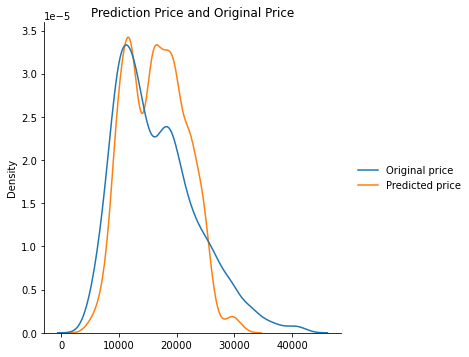

In [5]:
plot_prediction_compare_ori(en)

<Figure size 432x288 with 0 Axes>

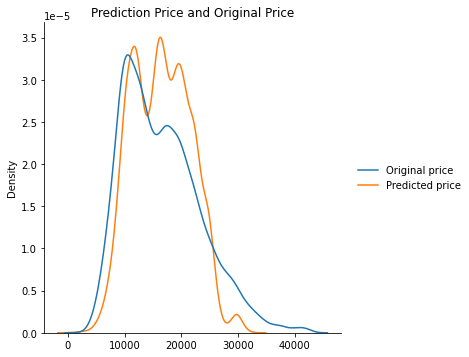

In [8]:
plot_prediction_compare_ori(en, X_train, y_train)

In [ ]:
from sklearn.grid_search import GridSearchCV
